In [2]:
#import dataset
import pandas as pd

In [3]:
#make a pandas dataframe for the wine data
wine = pd.read_csv('wine_reviews.csv')

In [4]:
wine.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,french_grape
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,True


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from wordcloud import WordCloud, STOPWORDS 

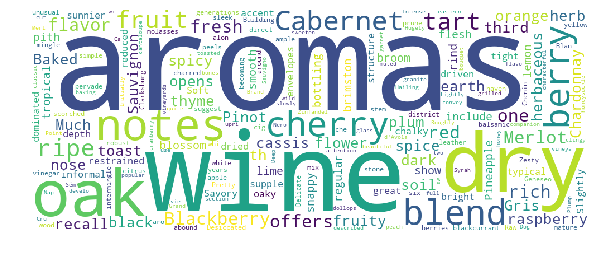

In [7]:
sns.set_style('darkgrid')
wordcloud = WordCloud(width = 1000, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(str(wine.description)) 
# Generate wordcloud of most popular words in wine descriptions
plt.figure(figsize = (10, 10), facecolor = None) 
plt.tight_layout(pad = 0) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

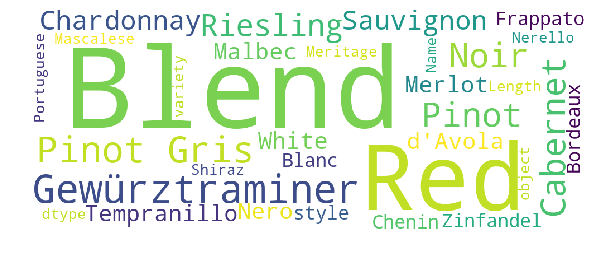

In [8]:
sns.set_style('darkgrid')
wordcloud = WordCloud(width = 1000, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(str(wine.variety)) 
# Generate wordcloud of most popular words in wine variety
plt.figure(figsize = (10, 10), facecolor = None) 
plt.tight_layout(pad = 0) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/Users/lrsterngmail.com/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


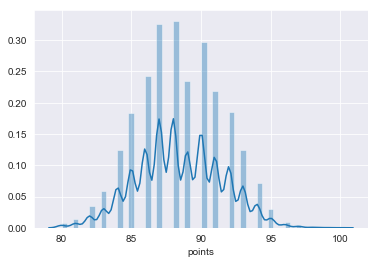

In [9]:
#graph wine points
sns.set_style('darkgrid')
sns.distplot(wine.points)

Text(0, 0.5, 'Count of Reviews')

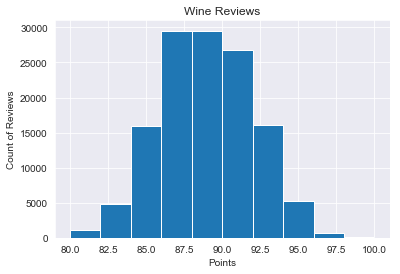

In [10]:
#I normally like seaborn better, but let's try it in matplotlib and see if it looks better
plt.hist(wine.points)
plt.title('Wine Reviews')
plt.xlabel('Points')
plt.ylabel('Count of Reviews')

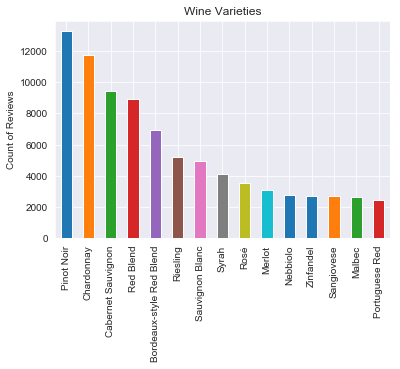

In [11]:
#Graph count of 15 most popular wine varieties
s = wine.variety
s.value_counts()[:15].plot(kind="bar")
plt.title('Wine Varieties')
plt.ylabel('Count of Reviews')
plt.show()

In [12]:
#see counts of wine varieties
s.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [13]:
#look at the data in wine for points and price
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [14]:
#change the values in "french_grape" from True/False to 1/0
wine[["french_grape"]] *= 1

In [15]:
wine.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,french_grape
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0


In [16]:
#how many reviews in the entire dataset
wine.french_grape.count()

129971

In [17]:
wine.shape

(129971, 14)

In [18]:
#how many reviews are for french grapes?
wine.french_grape.sum()

74416

In [19]:
#what percent of the data is made with french grapes?
74416/129971

0.5725584938178516

In [20]:
#make new dataframe that only contains the reviews for french grapes
frenchWine = wine[(wine.french_grape == 1)]

In [21]:
#check to make sure its the right size
frenchWine.shape

(74416, 14)

In [22]:
#make new dataframe that only contains the reviews for the not french grapes
notFrench = wine[(wine.french_grape == 0)]

In [23]:
#check to make sure its the right size
notFrench.shape

(55555, 14)

In [24]:
#look at the data in french grapes for points and price
frenchWine.describe()

,points,price
count,74416.000000,69913.000000
mean,88.548417,37.915910
std,3.139686,45.798845
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [25]:
#look at the data in not french for points and price
notFrench.describe()

,points,price
count,55555.000000,51062.000000
mean,88.311475,31.868532
std,2.894928,33.074198
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,37.000000
max,100.000000,1100.000000


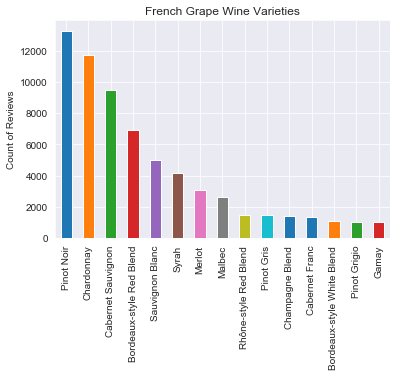

In [26]:
#Graph count of 15 most popular wine varieties in french grapes
f = frenchWine.variety
f.value_counts()[:15].plot(kind="bar")
plt.title('French Grape Wine Varieties')
plt.ylabel('Count of Reviews')
plt.show()

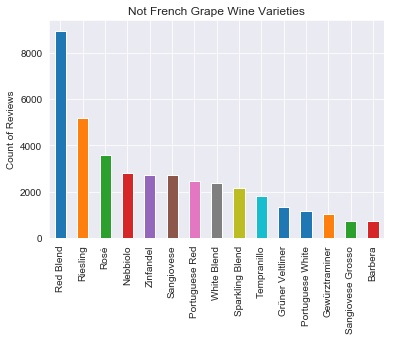

In [27]:
#Graph count of 15 most popular wine varieties in french grapes
nf = notFrench.variety
nf.value_counts()[:15].plot(kind="bar")
plt.title('Not French Grape Wine Varieties')
plt.ylabel('Count of Reviews')
plt.show()

Text(0.5, 1.0, 'Price Vs Points all wine')

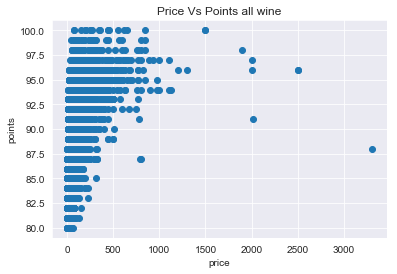

In [28]:
#plot wine reviews compairing price and points of the entire dataset
plt.scatter(wine.price, wine.points)
plt.xlabel('price')
plt.ylabel('points')
plt.title("Price Vs Points all wine")

Text(0.5, 1.0, 'Price Vs Points French Grapes')

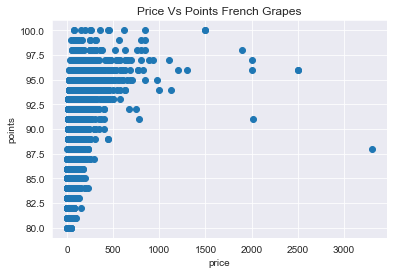

In [29]:
#plot wine reviews compairing price and points of the french grapes
plt.scatter(frenchWine.price, frenchWine.points)
plt.xlabel('price')
plt.ylabel('points')
plt.title("Price Vs Points French Grapes")

Text(0.5, 1.0, 'Price Vs Points Not French Grapes')

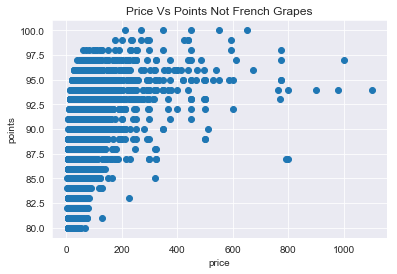

In [30]:
#plot wine reviews compairing price and points of the not french grapes
plt.scatter(notFrench.price, notFrench.points)
plt.xlabel('price')
plt.ylabel('points')
plt.title("Price Vs Points Not French Grapes")

In [31]:
#all of the largest outliers for price are made with french grapes

(array([  677.,  2944.,  9312., 15918., 15764., 15635., 10095.,  3485.,
          496.,    90.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 10 Patch objects>)

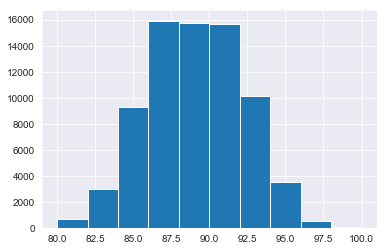

In [32]:
#graph count of reviews of french grapes
plt.hist(frenchWine.points)

(array([  412.,  1917.,  6698., 13615., 13669., 11134.,  6007.,  1808.,
          256.,    39.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 10 Patch objects>)

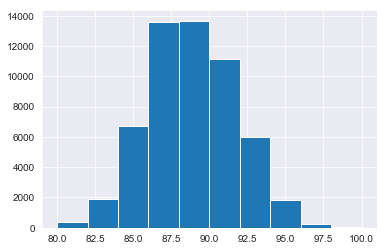

In [33]:
#graph count of reviews of not french grapes
plt.hist(notFrench.points)

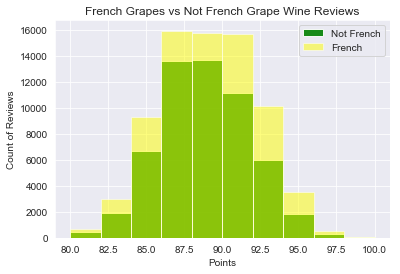

In [34]:
#graph the 2 histograms from above on top of eachother with better lables
legend = ['Not French', 'French']
reviews_french = frenchWine.points
reviews_not_french = notFrench.points
plt.title('French Grapes vs Not French Grape Wine Reviews')
plt.xlabel('Points')
plt.ylabel('Count of Reviews')
plt.hist(reviews_not_french, alpha=0.9, color = "green")
plt.hist(reviews_french, alpha=0.5, color = "yellow")
plt.legend(legend, loc='upper right')
plt.show()

In [35]:
# t test for points

# Calculate difference between distribution means for points

notFrench.points.mean() - frenchWine.points.mean() 

-0.236941892344106

In [36]:
import numpy as np

In [37]:
from scipy import stats

In [38]:
#small effect size with signaficant results
stats.ttest_ind(frenchWine.points, notFrench.points)

Ttest_indResult(statistic=13.912327425664284, pvalue=5.733810803012527e-44)

Now that I've looked into French vs Not French which was my orginal idea, now I want to look a price and see if I can gleam some insight into recomendations for finding a good cheap wine.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 43 Text xticklabel objects>)

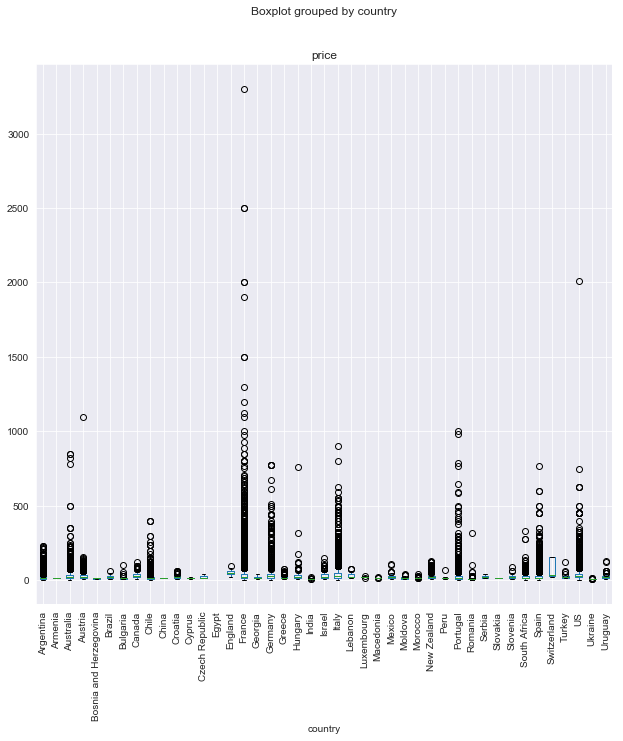

In [39]:
#boxplot of wine price by country, no surprise that France has the most expensive wine
wine.boxplot('price', by='country', figsize=(10,10))
plt.xticks(rotation='vertical')

In [40]:
#calculate the mean wine price by country
df_country = wine[['country','price']]
df_country.groupby('country').mean()

,price
country,
Argentina,24.510117
Armenia,14.500000
Australia,35.437663
Austria,30.762772
Bosnia and Herzegovina,12.500000
Brazil,23.765957
Bulgaria,14.645390
Canada,35.712598
Chile,20.786458


In [41]:
#lets look at the prices by country
df_country.groupby('country').describe()

price                                           \
                          count       mean        std   min    25%   50%   
country                                                                    
Argentina                3756.0  24.510117  23.430122   4.0  12.00  17.0   
Armenia                     2.0  14.500000   0.707107  14.0  14.25  14.5   
Australia                2294.0  35.437663  49.049458   5.0  15.00  21.0   
Austria                  2799.0  30.762772  27.224797   7.0  18.00  25.0   
Bosnia and Herzegovina      2.0  12.500000   0.707107  12.0  12.25  12.5   
Brazil                     47.0  23.765957  11.053649  10.0  15.00  20.0   
Bulgaria                  141.0  14.645390   9.508744   8.0  10.00  13.0   
Canada                    254.0  35.712598  19.658148  12.0  21.00  30.0   
Chile                    4416.0  20.786458  21.929371   5.0  12.00  15.0   
China                       1.0  18.000000        NaN  18.0  18.00  18.0   
Croatia                    71.0  25.450704  12.993173  12.0  16.50  20.0   
Cyprus                     11.0  16.272727   2.831639  11.0  14.50  16.0   
Czech Republic             12.0  24.250000  12.053856  15.0  15.00  18.0   
Egypt                       0.0        NaN        NaN   NaN    NaN   NaN   
England                    69.0  51.681159  14.858641  25.0  43.00  50.0   
France                  17776.0  41.139120  73.769404   5.0  16.00  25.0   
Georgia                    84.0  19.321429   7.642873   9.0  13.00  17.5   
Germany                  2120.0  42.257547  62.860308   5.0  18.00  26.0   
Greece                    461.0  22.364425  10.610780   8.0  15.00  19.0   
Hungary                   145.0  40.648276  69.451075  10.0  19.00  25.0   
India                       9.0  13.333333   3.640055  10.0  12.00  12.0   
Israel                    489.0  31.768916  18.898287   8.0  18.00  25.0   
Italy                   16914.0  39.663770  38.052479   5.0  18.00  28.0   
Lebanon                    35.0  30.685714  18.038800  13.0  19.50  25.0   
Luxembourg                  6.0  23.333333   4.633213  16.0  22.25  23.0   
Macedonia                  12.0  15.583333   1.443376  15.0  15.00  15.0   
Mexico                     70.0  26.785714  17.755091   8.0  15.25  22.0   
Moldova                    59.0  16.745763   9.522375   8.0  10.00  13.0   
Morocco                    28.0  19.500000   5.903546  14.0  16.50  18.0   
New Zealand              1378.0  26.931785  17.101083   7.0  16.00  20.0   
Peru                       16.0  18.062500  13.664888  10.0  14.00  14.5   
Portugal                 4875.0  26.218256  41.175241   5.0  12.00  16.0   
Romania                   120.0  15.241667  30.286863   4.0   7.00   9.0   
Serbia                     12.0  24.500000  10.264679  15.0  17.50  21.0   
Slovakia                    1.0  16.000000        NaN  16.0  16.00  16.0   
Slovenia                   80.0  24.812500  13.982895   7.0  15.00  20.0   
South Africa             1293.0  24.668987  21.843064   5.0  13.00  19.0   
Spain                    6573.0  28.215275  34.662397   4.0  13.00  18.0   
Switzerland                 7.0  85.285714  70.063577  21.0  29.00  38.0   
Turkey                     90.0  24.633333  13.799894  14.0  17.00  20.0   
US                      54265.0  36.573464  27.088857   4.0  20.00  30.0   
Ukraine                    14.0   9.214286   2.190138   6.0   9.00   9.0   
Uruguay                   109.0  26.403670  18.483786  10.0  16.00  20.0   

                                        
                           75%     max  
country                                 
Argentina                25.00   230.0  
Armenia                  14.75    15.0  
Australia                38.00   850.0  
Austria                  36.50  1100.0  
Bosnia and Herzegovina   12.75    13.0  
Brazil                   29.00    60.0  
Bulgaria                 16.00   100.0  
Canada                   40.75   120.0  
Chile                    20.00   400.0  
China                    18.00    18.

In [42]:
#OLS regression of price by country
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_price = ols('price~country',data=wine).fit()
anova_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     57.27
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:10:58   Log-Likelihood:            -6.1953e+05
No. Observations:              120916   AIC:                         1.239e+06
Df Residuals:                  120874   BIC:                         1.240e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            24.5101      0.663     36.957      0.000      23.210      25.810
country[T.Armenia]                  -10.0101     28.748     -0.348      0.728     -66.356      46.336
country[T.Australia]                 10.9275      1.077     10.146      0.000       8.817      13.039
country[T.Austria]                    6.2527      1.015      6.161      0.000       4.263       8.242
country[T.Bosnia and Herzegovina]   -12.0101     28.748     -0.418      0.676     -68.356      44.336
country[T.Brazil]                    -0.7442      5.966     -0.125      0.901     -12.437      10.948
country[T.Bulgaria]                  -9.8647      3.487     -2.829      0.005     -16.698      -3.031
country[T.Canada]                    11.2025      2.635      4.251      0.000       6.038      16.367
country[T.Chile]                     -3.7237      0.902     -4.127      0.000      -5.492      -1.955
country[T.China]                     -6.5101     40.651     -0.160      0.873     -86.185      73.164
country[T.Croatia]                    0.9406      4.869      0.193      0.847      -8.603      10.484
country[T.Cyprus]                    -8.2374     12.273     -0.671      0.502     -32.292      15.817
country[T.Czech Republic]            -0.2601     11.752     -0.022      0.982     -23.294      22.774
country[T.Egypt]                   2.091e-13   5.61e-13      0.373      0.709    -8.9e-13    1.31e-12
country[T.England]                   27.1710      4.938      5.503      0.000      17.493      36.849
country[T.France]                    16.6290      0.730     22.782      0.000      15.198      18.060
country[T.Georgia]                   -5.1887      4.484     -1.157      0.247     -13.977       3.600
country[T.Germany]                   17.7474      1.104     16.074      0.000      15.583      19.912
country[T.Greece]                    -2.1457      2.006     -1.070      0.285      -6.077       1.786
country[T.Hungary]                   16.1382      3.440      4.691      0.000       9.396      22.880
country[T.India]                    -11.1768     13.565     -0.824      0.410     -37.763      15.410
country[T.Israel]                     7.2588      1.954      3.715      0.000       3.429      11.089
country[T.Italy]                     15.1537      0.733     20.669      0.000      13.717      16.591
country[T.Lebanon]                    6.1756      6.902      0.895      0.371      -7.353      19.704
country[T.Luxembourg]                -1.1768     16.607     -0.071      0.944     -33.725      31.372
country[T.Macedonia]                 -8.9268     11.752     -0.760      0.447     -31.960      14.107
country[T.Mexico]                     2.2756      4.903      0.464      0.643      -7.334      11.886
country[T.Moldova]     

In [43]:
#what are the cheapest wines?
wine.price.min()

4.0

In [44]:
#new dataframe that only containes the cheapest wines
cheapest = wine[(wine.price == 4)]

In [45]:
cheapest

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,french_grape
1987,Spain,Berry and cherry aromas are surprisingly sturd...,Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,1
20484,US,"Fruity, soft and rather sweet, this wine smell...",NaN,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,0
29553,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,1
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Chardonnay (California),Chardonnay,Bandit,1
59507,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Jim Gordon,@gordone_cellars,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,1
61768,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,1
64590,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,1
110255,US,"A good everyday Merlot, dry and rich in tannin...",NaN,84,4.0,California,California,California Other,NaN,NaN,Bandit NV Merlot (California),Merlot,Bandit,1
112919,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,NaN,Michael Schachner,@wineschach,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,0
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",Flirty Bird,82,4.0,Central Spain,Vino de la Tierra de Castilla,NaN,Michael Schachner,@wineschach,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis,0


In [46]:
#how many are there?
cheapest.shape

(11, 14)

In [47]:
#make a new dataframe that doesn't contain as many columns for presentation purposes 
cheapest1 = cheapest[['title','variety','winery','country','province','points','price']]

In [48]:
#reset index
cheapest1.reset_index(drop=True, inplace=True)

In [49]:
cheapest1

,title,variety,winery,country,province,points,price
0,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,Spain,Central Spain,85,4.0
1,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,US,California,85,4.0
2,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,Argentina,Mendoza Province,84,4.0
3,Bandit NV Chardonnay (California),Chardonnay,Bandit,US,California,84,4.0
4,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,US,California,83,4.0
5,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,Spain,Levante,84,4.0
6,Bandit NV Merlot (California),Merlot,Bandit,US,California,86,4.0
7,Bandit NV Merlot (California),Merlot,Bandit,US,California,84,4.0
8,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,Spain,Levante,84,4.0
9,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis,Spain,Central Spain,82,4.0


In [50]:
#make the columns wider so that the title isn't cut off
pd.set_option('max_colwidth', 80)

In [51]:
cheapest1

,title,variety,winery,country,province,points,price
0,Felix Solis 2013 Flirty Bird Syrah (Vino de la Tierra de Castilla),Syrah,Felix Solis,Spain,Central Spain,85,4.0
1,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,US,California,85,4.0
2,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,Argentina,Mendoza Province,84,4.0
3,Bandit NV Chardonnay (California),Chardonnay,Bandit,US,California,84,4.0
4,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,US,California,83,4.0
5,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,Spain,Levante,84,4.0
6,Bandit NV Merlot (California),Merlot,Bandit,US,California,86,4.0
7,Bandit NV Merlot (California),Merlot,Bandit,US,California,84,4.0
8,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,Spain,Levante,84,4.0
9,Felix Solis 2012 Flirty Bird White (Vino de la Tierra de Castilla),White Blend,Felix Solis,Spain,Central Spain,82,4.0


In [52]:
#let's use $10 as a cutoff for looking at cheap wine
#make a new dataframe with all the wine $10 and under
cheap = wine[(wine.price <= 10)]

In [55]:
cheap.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,french_grape
27,Italy,"Aromas recall ripe dark berry, toast and a whiff of cake spice. The soft, in...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,0
42,France,"This is a festive wine, with soft, ripe fruit and acidity, plus a red berry ...",Nouveau,86,9.0,Beaujolais,Beaujolais,NaN,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,1


In [56]:
#lets look at the size of the data
cheap.shape

(6280, 14)

In [58]:
#look at the data in cheap for points and price
cheap.describe()

,points,price
count,6280.000000,6280.000000
mean,85.024045,9.172293
std,1.948835,1.126466
min,80.000000,4.000000
25%,84.000000,9.000000
50%,85.000000,10.000000
75%,86.000000,10.000000
max,91.000000,10.000000


In [59]:
#calculate the mean wine price and points by country of cheap wine
df_country_cheap = cheap[['country','price','points']]
df_country_cheap.groupby('country').mean()

,price,points
country,,
Argentina,9.272093,84.181395
Australia,8.965116,85.075581
Austria,9.781250,86.468750
Brazil,10.000000,82.000000
Bulgaria,9.133333,85.777778
Chile,9.156038,84.503392
France,9.503175,85.330159
Georgia,9.714286,85.857143
Germany,9.387755,87.183673
